# Анализируем данные на датасете Titanic

In [2]:
# импортируем pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Всего 891 человек, пропуски есть в колонке Age, Cabin и 2 пропуска в Embarked**

# Задача: предсказать, выживет ли человек (целевая переменная - Survived)

**1. Посчитаем количество выживших**

In [5]:
dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [6]:
print(f"Процент погибших {round(len(dataset[dataset['Survived'] == 0])/len(dataset)*100, 2)}")
print(f"Процент выживших {round(len(dataset[dataset['Survived'] == 1])/len(dataset)*100, 2)}")

Процент погибших 61.62
Процент выживших 38.38


**2. Теперь проанализируем кол-во выживших среди разных классов (Pclass)**

In [7]:
dataset['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


Больше всего пассажиров третьего класса

In [8]:
print(f"Процент выживших среди пассажиров 1ого класса {round(len(dataset[dataset['Pclass'] == 1]) / len(dataset)*100, 2)}")
print(f"Процент выживших среди пассажиров 2ого класса {round(len(dataset[dataset['Pclass'] == 2]) / len(dataset)*100, 2)}")
print(f"Процент выживших среди пассажиров 3ого класса {round(len(dataset[dataset['Pclass'] == 3]) / len(dataset)*100, 2)}")

Процент выживших среди пассажиров 1ого класса 24.24
Процент выживших среди пассажиров 2ого класса 20.65
Процент выживших среди пассажиров 3ого класса 55.11


**3. Посмотрим зависимость с полом (Sex)**

In [9]:
dataset['Sex'].value_counts()

,count
Sex,
male,577
female,314


**Сравним количество выживших относительно пола**

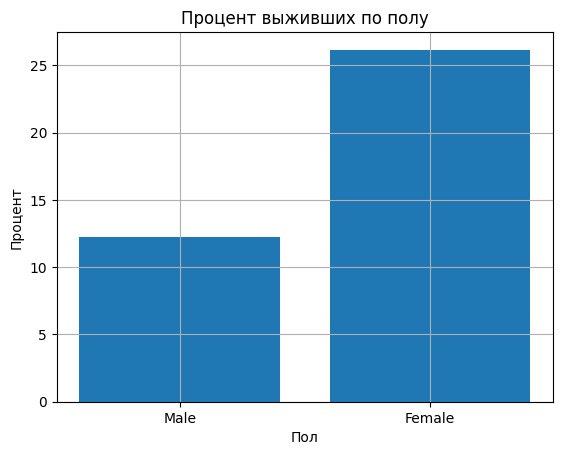

In [10]:
sex = ['Male', 'Female']
values = np.array([round((len(dataset[(dataset['Sex'] == 'male') & (dataset['Survived'] == 1)]) / len(dataset)) * 100, 2), round((len(dataset[(dataset['Sex'] == 'female') & (dataset['Survived'] == 1)]) / len(dataset)) * 100, 2)])
plt.bar(sex, values)

plt.title('Процент выживших по полу')
plt.xlabel('Пол')
plt.ylabel('Процент')
plt.grid(True)
plt.show()

**Заметим, что процент выживших среди женского пола выше**

**4. Посмотрим зависимость от возраста**

In [11]:
dataset['Age'].describe()  # мин.возраст - 0, макс.возраст - 80

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [12]:
# заполним NaN значения медианой
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [13]:
dataset['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


Создам признак **AgeGroup**

In [14]:
bins = [0, 17, 24, 34, 49, 64, 120]
labels = ['Childhood', 'Late teenagers', 'Youth', 'Adulthood', 'Elderly', 'Old age']

dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=True)
dataset = dataset.drop(columns=['Age'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Late teenagers
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Adulthood
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Adulthood
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,Adulthood


In [15]:
values_age = np.array([])
for age_group in labels:
  curr = round((len(dataset[(dataset['AgeGroup'] == age_group) & (dataset['Survived'] == 1)]) / len(dataset)) * 100, 2)
  values_age = np.append(values_age, curr)

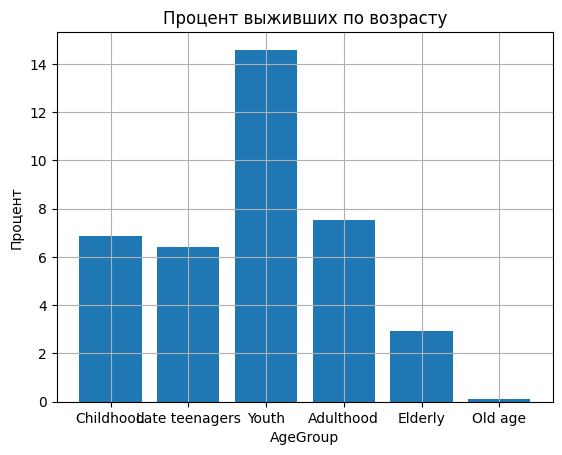

In [16]:
plt.bar(labels, values_age)

plt.title('Процент выживших по возрасту')
plt.xlabel('AgeGroup')
plt.ylabel('Процент')
plt.grid(True)
plt.show()

Больший процент выживших в возрастной категории 24-34 года

**Cabin & Ticket number**

In [17]:
# скорее всего нет никакой корреляции между номером каюты и номером билеты -> удалим
dataset = dataset.drop(columns=['Cabin', 'Ticket'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,Late teenagers
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,Adulthood
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,Adulthood
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,Adulthood


**Посмотрим корреляцию Пирсона между SibSp и Parch**

In [18]:
# нет пропусков в этих признаках
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     889 non-null    object  
 9   AgeGroup     891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 63.9+ KB


In [19]:
print(f"Коэффициент Пирсона {round(dataset['SibSp'].corr(dataset['Parch']), 2)}")

Коэффициент Пирсона 0.41


In [20]:
# теперь тоже удали столбцы SibSp и Parch
dataset = dataset.drop(columns=['SibSp', 'Parch'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500,S,Late teenagers
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833,C,Adulthood
2,3,1,3,"Heikkinen, Miss. Laina",female,7.9250,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000,S,Adulthood
4,5,0,3,"Allen, Mr. William Henry",male,8.0500,S,Adulthood


**Имя тоже не влияет на то, выживет ли человек**

In [21]:
dataset = dataset.drop(columns=['Name'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,AgeGroup
0,1,0,3,male,7.2500,S,Late teenagers
1,2,1,1,female,71.2833,C,Adulthood
2,3,1,3,female,7.9250,S,Youth
3,4,1,1,female,53.1000,S,Adulthood
4,5,0,3,male,8.0500,S,Adulthood


**Исследуем Fare - сколько пассажир заплатил**

In [22]:
dataset['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


**Тоже создадим новый признак - FareGroup**

In [23]:
bins = [0, 8, 15, 31, 520]
labels = ['0-8', '8-15', '15-31', '31-520']

dataset['FareGroup'] = pd.cut(dataset['Fare'], bins=bins, labels=labels, right=True)
dataset = dataset.drop(columns=['Fare'], axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Embarked,AgeGroup,FareGroup
0,1,0,3,male,S,Late teenagers,0-8
1,2,1,1,female,C,Adulthood,31-520
2,3,1,3,female,S,Youth,0-8
3,4,1,1,female,S,Adulthood,31-520
4,5,0,3,male,S,Adulthood,8-15


**Зависимость Embarked от количества выживших**

In [24]:
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [28]:
print(f"Количество выживших, севших в Southampton {len(dataset[(dataset['Embarked'] == 'S') & (dataset['Survived'] == 1)])}")
print(f"Количество выживших, севших в Cherbourg {len(dataset[(dataset['Embarked'] == 'C') & (dataset['Survived'] == 1)])}")
print(f"Количество выживших, севших в Queenstown {len(dataset[(dataset['Embarked'] == 'Q') & (dataset['Survived'] == 1)])}")

Количество выживших, севших в Southampton 217
Количество выживших, севших в Cherbourg 93
Количество выживших, севших в Queenstown 30


In [32]:
print(f"Процент выживших, севших в Southampton {round(len(dataset[(dataset['Embarked'] == 'S') & (dataset['Survived'] == 1)]) / len(dataset[(dataset['Embarked'] == 'S')])*100, 2)}")
print(f"Процент выживших, севших в Cherbourg {round(len(dataset[(dataset['Embarked'] == 'C') & (dataset['Survived'] == 1)]) / len(dataset[(dataset['Embarked'] == 'C')])*100, 2)}")
print(f"Процент выживших, севших в Queenstown {round(len(dataset[(dataset['Embarked'] == 'Q') & (dataset['Survived'] == 1)]) / len(dataset[(dataset['Embarked'] == 'Q')])*100, 2)}")

Процент выживших, севших в Southampton 33.7
Процент выживших, севших в Cherbourg 55.36
Процент выживших, севших в Queenstown 38.96


# Label Encoding - переведем все категориальные признаки в числовые

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

# 1 - male, 0 - female
dataset['Sex'] = label_encoding.fit_transform(dataset['Sex'])

# 2 - S, 0 - C, 1 - Q
dataset['Embarked'] = label_encoding.fit_transform(dataset['Embarked'])

# Childhood - 1, Late teenagers - 3, Youth - 5, Adulthood - 0, Elderly - 2, Old age - 4
dataset['AgeGroup'] = label_encoding.fit_transform(dataset['AgeGroup'])

labels = ['0-8', '8-15', '15-31', '31-520']

# 0-8: 0, 8-15: 3, 15-31: 1, 31-520: 2
dataset['FareGroup'] = label_encoding.fit_transform(dataset['FareGroup'])

dataset.head(20)


,PassengerId,Survived,Pclass,Sex,Embarked,AgeGroup,FareGroup
0,1,0,3,1,2,3,0
1,2,1,1,0,0,0,2
2,3,1,3,0,2,5,0
3,4,1,1,0,2,0,2
4,5,0,3,1,2,0,3
5,6,0,3,1,1,5,3
6,7,0,1,1,2,2,2
7,8,0,3,1,2,1,1
8,9,1,3,0,2,5,3
9,10,1,2,0,0,1,1


In [54]:
dataset = dataset.drop(columns=['PassengerId'], axis=1)
dataset.head()

,Survived,Pclass,Sex,Embarked,AgeGroup,FareGroup
0,0,3,1,2,3,0
1,1,1,0,0,0,2
2,1,3,0,2,5,0
3,1,1,0,2,0,2
4,0,3,1,2,0,3


# Подготовка train/test datasets

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = dataset.drop(columns=['Survived']).values
y = dataset['Survived'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [2.30196629 0.64606742 1.5        3.04494382 1.51404494]
После масштабирования:  [-7.59380074e-17 -8.10837040e-18 -3.08741796e-17 -4.17892936e-17
 -2.12065072e-17]


# Решим эту задачу, используя разные модели

In [46]:
from sklearn.metrics import classification_report

**1. Логистическая регрессия**

In [47]:
from sklearn.linear_model import LogisticRegression

In [60]:
clf_log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)
y_pred_log_reg = clf_log_reg.predict(X_test_scaled)

In [61]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       113
           1       0.74      0.73      0.73        66

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**2. Метод опорных векторов**

In [62]:
from sklearn import svm

In [63]:
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_scaled, y_train)

SVC()

In [64]:
y_pred_svm = clf_svm.predict(X_test_scaled)

In [65]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       113
           1       0.89      0.64      0.74        66

    accuracy                           0.84       179
   macro avg       0.86      0.80      0.81       179
weighted avg       0.85      0.84      0.83       179

